In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn_benchmarks.utils import plot

<br></br>
## KNeighborsClassifier

In [2]:
d4p_knn = pd.read_csv('sklearn_benchmarks/results/daal4py/KNeighborsClassifier.csv')

In [3]:
skl_knn = pd.read_csv('sklearn_benchmarks/results/sklearn/KNeighborsClassifier.csv')

In [4]:
merged_df_knn = skl_knn.merge(d4p_knn, on=['estimator', 'function', 'n_samples', 'n_features', 'algorithm', 'n_jobs', 'n_neighbors'], suffixes=['_skl', '_d4p'])

In [5]:
merged_df_knn['speedup'] = merged_df_knn['time_elapsed_skl'] / merged_df_knn['time_elapsed_d4p']

In [6]:
merged_df_knn.sort_values('speedup', ascending=False).head()

,estimator,lib_skl,function,time_elapsed_skl,n_samples,n_features,algorithm,n_jobs,n_neighbors,accuracy_score_skl,roc_auc_score_skl,lib_d4p,time_elapsed_d4p,accuracy_score_d4p,roc_auc_score_d4p,speedup
11,KNeighborsClassifier,sklearn,predict,43.040455,1000,100,brute,-1,10,0.893,0.891650,daal4py,1.050211,0.903,0.902940,40.982663
6,KNeighborsClassifier,sklearn,predict,43.005161,1000,100,brute,-1,5,0.866,0.867294,daal4py,1.076207,0.862,0.862186,39.959937
21,KNeighborsClassifier,sklearn,predict,45.060691,1000,100,brute,-1,100,0.947,0.947810,daal4py,1.159649,0.945,0.945305,38.857197
16,KNeighborsClassifier,sklearn,predict,42.207658,1000,100,brute,-1,50,0.944,0.944626,daal4py,1.110831,0.940,0.940334,37.996457
12,KNeighborsClassifier,sklearn,predict,4.319382,100,100,brute,-1,10,0.893,0.891650,daal4py,0.150873,0.903,0.902940,28.629333


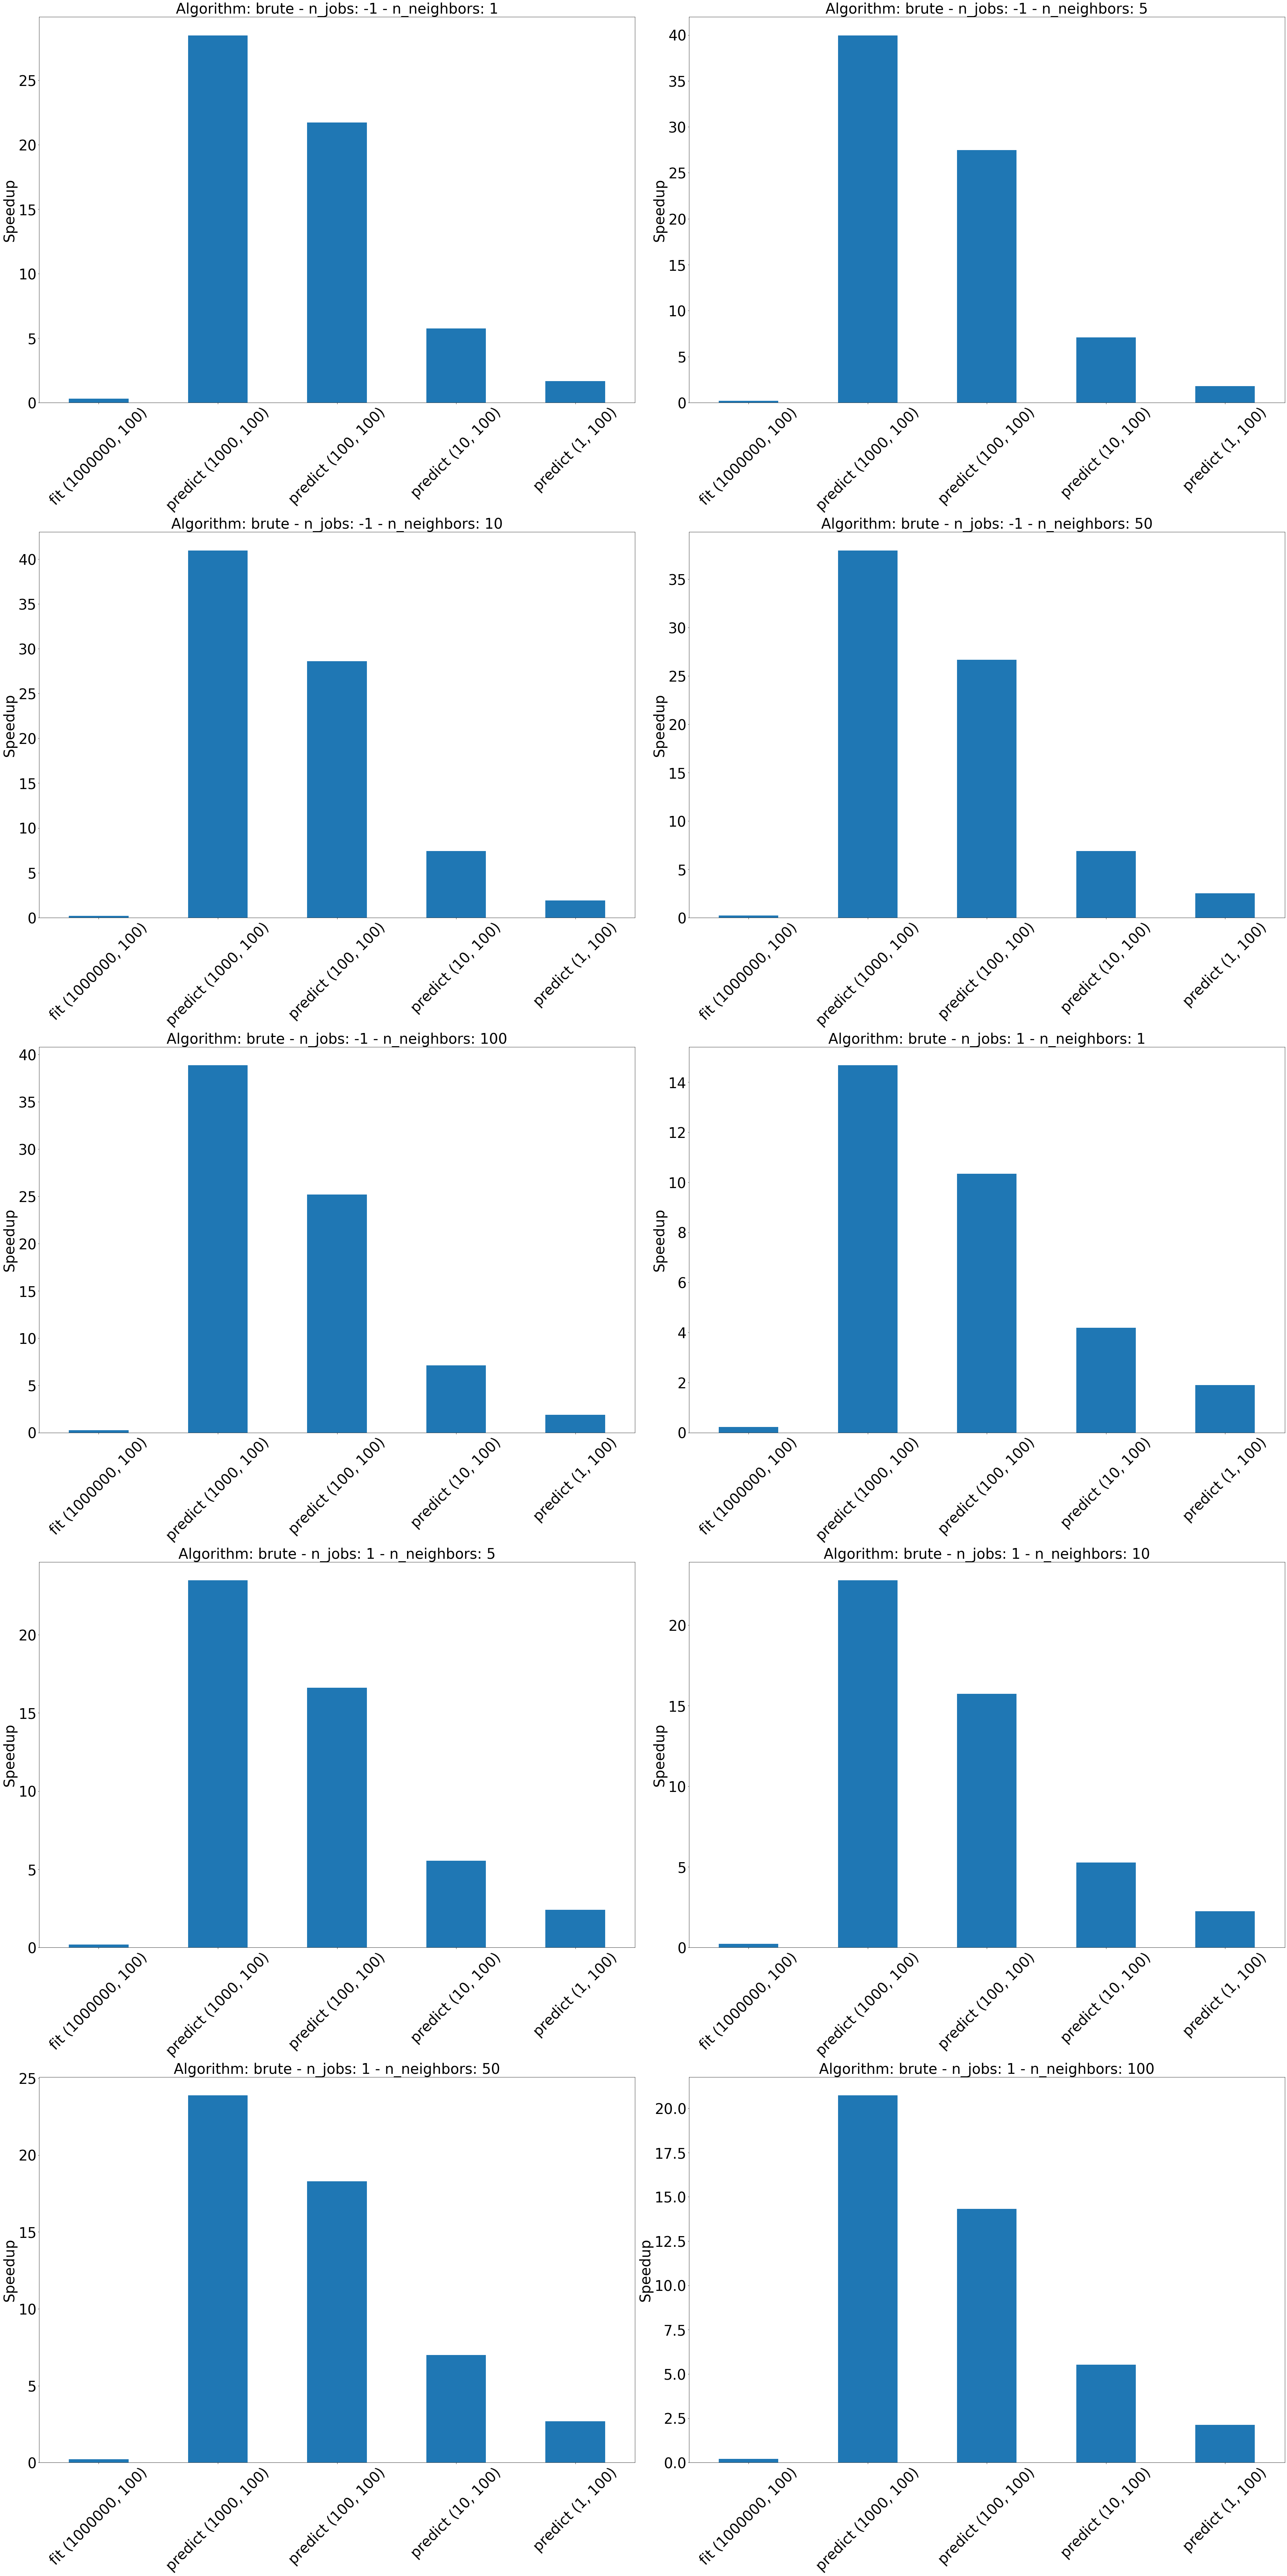

In [7]:
merged_df_knn_grouped = merged_df_knn.groupby(['algorithm', 'n_jobs', 'n_neighbors'])
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(50, 100))
axes = axes.flatten()
for (params, df), ax in zip(merged_df_knn_grouped, axes):
    df['speedup'].plot.bar(ax=ax)
    title = "Algorithm: %s - n_jobs: %s - n_neighbors: %s" % params
    ax.set_title(title, fontdict={'fontsize': 40})
    ax.set_ylabel('Speedup', fontdict={'fontsize': 40})
    ax.tick_params(axis='both', which='major', labelsize=40)
    labels = [f"{func} ({ns}, {nf})" for func, ns, nf in df[['function', 'n_samples', 'n_features']].to_numpy()]
    ax.set_xticklabels(labels=labels)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
plt.tight_layout();

<br></br>
## KMeans

In [8]:
d4p_kmeans = pd.read_csv('sklearn_benchmarks/results/daal4py/KMeans.csv')
d4p_kmeans.head()

,estimator,lib,function,time_elapsed,n_samples,n_features,init,max_iter,n_clusters,n_init,tol,adjusted_rand_score
0,KMeans,daal4py,fit,0.023941,1000,2,k-means++,30,3,1,1.000000e-16,NaN
1,KMeans,daal4py,predict,0.000233,1000,2,k-means++,30,3,1,1.000000e-16,1.0
2,KMeans,daal4py,predict,0.000140,100,2,k-means++,30,3,1,1.000000e-16,1.0
3,KMeans,daal4py,predict,0.000127,10,2,k-means++,30,3,1,1.000000e-16,1.0
4,KMeans,daal4py,predict,0.000123,1,2,k-means++,30,3,1,1.000000e-16,1.0


In [9]:
skl_kmeans = pd.read_csv('sklearn_benchmarks/results/sklearn/KMeans.csv')

In [10]:
merged_df_kmeans = skl_kmeans.merge(d4p_kmeans, on=['estimator', 'function', 'n_samples', 'n_features', 'init', 'max_iter', 'n_clusters', 'n_init', 'tol'], suffixes=['_skl', '_d4p'])

In [11]:
merged_df_kmeans['speedup'] = merged_df_kmeans['time_elapsed_skl'] / merged_df_kmeans['time_elapsed_d4p']

In [12]:
merged_df_kmeans.sort_values('speedup', ascending=False)

,estimator,lib_skl,function,time_elapsed_skl,n_samples,n_features,init,max_iter,n_clusters,n_init,tol,adjusted_rand_score_skl,lib_d4p,time_elapsed_d4p,adjusted_rand_score_d4p,speedup
138,KMeans,sklearn,fit,0.068885,100000,2,random,30,3,1,1.000000e-16,NaN,daal4py,0.004573,NaN,15.062718
51,KMeans,sklearn,fit,0.005156,1000,2,random,30,8,1,1.000000e-16,NaN,daal4py,0.000799,NaN,6.452086
68,KMeans,sklearn,fit,0.005614,1000,100,k-means++,30,3,1,1.000000e-16,NaN,daal4py,0.000938,NaN,5.988268
136,KMeans,sklearn,fit,0.034096,100000,2,k-means++,30,3,1,1.000000e-16,NaN,daal4py,0.006122,NaN,5.569662
140,KMeans,sklearn,fit,0.212485,100000,100,k-means++,30,3,1,1.000000e-16,NaN,daal4py,0.038848,NaN,5.469657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,KMeans,sklearn,predict,0.000194,100,2,random,30,3,1,1.000000e-16,1.0,daal4py,0.000179,1.0,1.080909
113,KMeans,sklearn,predict,0.000168,10,100,random,30,3,1,1.000000e-16,1.0,daal4py,0.000164,1.0,1.021911
111,KMeans,sklearn,predict,0.000166,10,100,random,30,3,1,1.000000e-16,1.0,daal4py,0.000164,1.0,1.010126
12,KMeans,sklearn,predict,0.000165,10,2,k-means++,30,3,1,1.000000e-16,1.0,daal4py,0.000168,1.0,0.979766


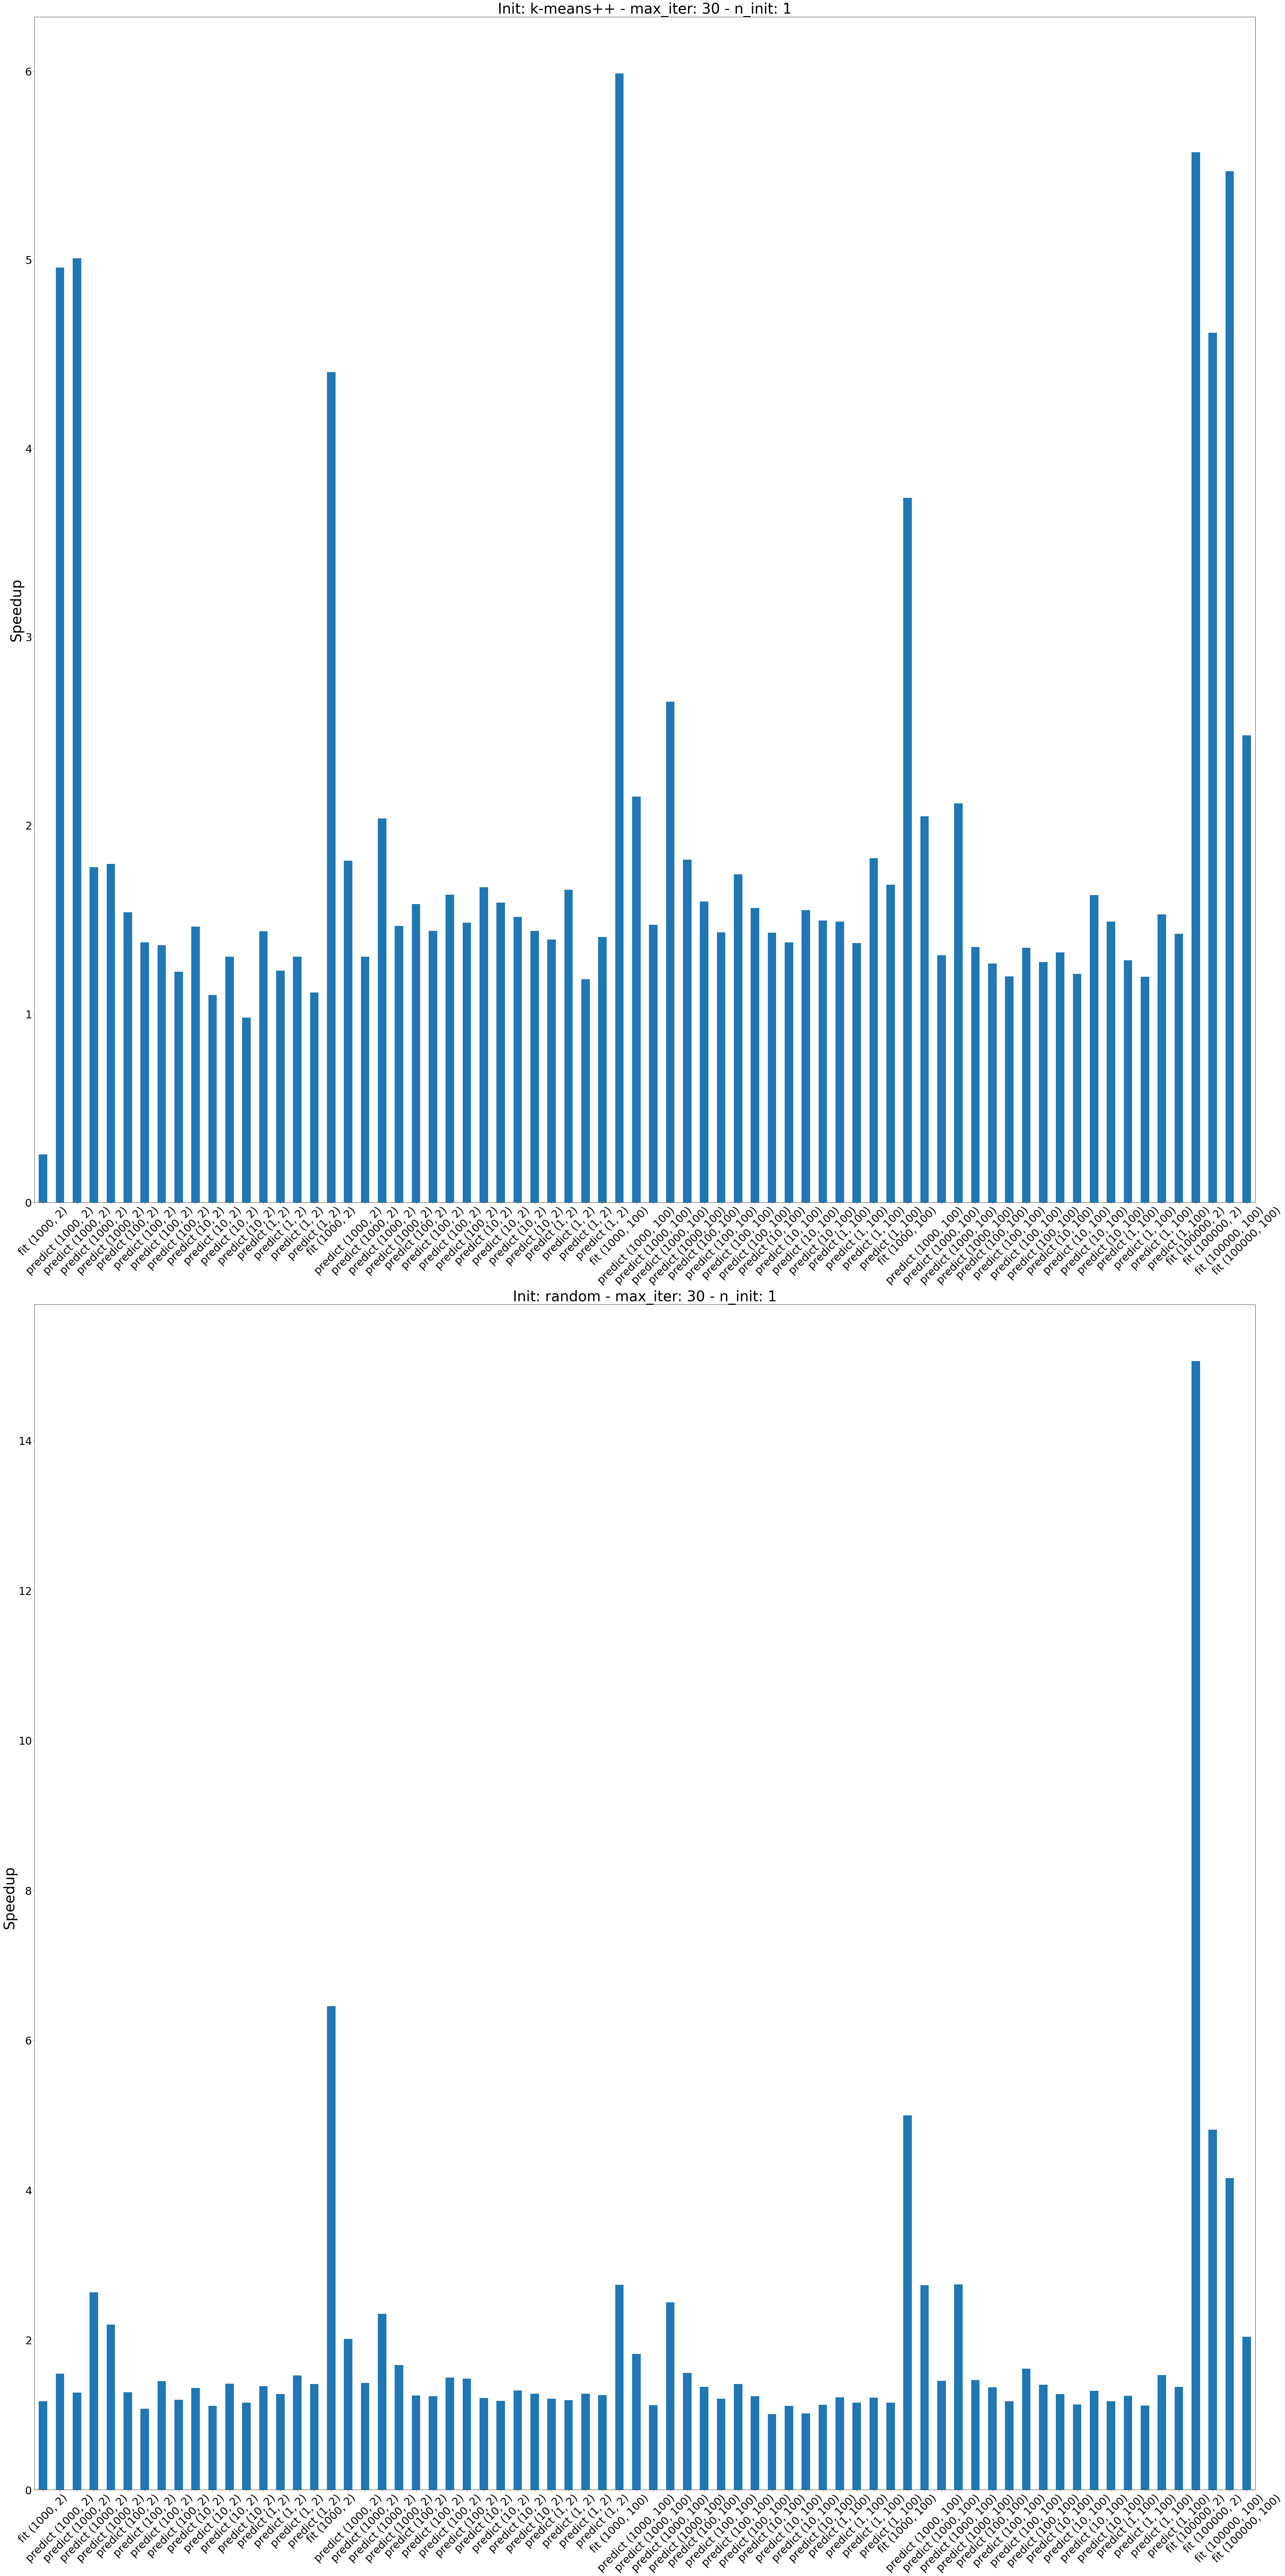

In [16]:
merged_df_kmeans_grouped = merged_df_kmeans.groupby(['init', 'max_iter', 'n_init'])
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(50, 100))
axes = axes.flatten()
for (params, df), ax in zip(merged_df_kmeans_grouped, axes):
    df['speedup'].plot.bar(ax=ax)
    title = "Init: %s - max_iter: %s - n_init: %s" % params
    ax.set_title(title, fontdict={'fontsize': 40})
    ax.set_ylabel('Speedup', fontdict={'fontsize': 40})
    ax.tick_params(axis='both', which='major', labelsize=30)
    labels = [f"{func} ({ns}, {nf})" for func, ns, nf in df[['function', 'n_samples', 'n_features']].to_numpy()]
    ax.set_xticklabels(labels=labels)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
plt.tight_layout();